## QUESTION NUMBER 1

In [43]:
import pandas as pd
import numpy as np

In [ ]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df=pd.DataFrame(data)
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [45]:
# encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [46]:
# Split data
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']
print("Data without target variable\n", X)
print("Target variable", y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape
y_train.shape, y_test.shape 

print("X_train\n", X_train.shape)
print("y_train\n", y_train.shape)
print("X_test\n", X_test.shape)
print("y_test\n", y_test.shape)


Data without target variable
     Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0
Target variable 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayTennis, dtype: int64
X_train
 (9, 4)
y_train
 (9,)
X_test
 (5, 4)
y_test
 (5,)


In [47]:
# # Decision Tree Classifier
# # Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)

# def entropy(y):
#     value, counts = np.unique(y, return_counts=True)
#     prob = counts / counts.sum()
#     entropy = -np.sum(prob * np.log2(prob))
#     return entropy


# def information_gain(X, y, feature):
#     # Entropy of the original dataset
#     original_entropy = entropy(y)
#     values, counts = np.unique(X[feature], return_counts=True)
    
#     weighted_entropy = 0
#     for v, c in zip(values, counts):
#         y_subset = y[X[feature] == v]
#         weighted_entropy += (c / counts.sum()) * entropy(y_subset)
    
#     # Information Gain
#     info_gain = original_entropy - weighted_entropy
#     return info_gain

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Confusion Matrix:
 [[1 1]
 [1 2]]


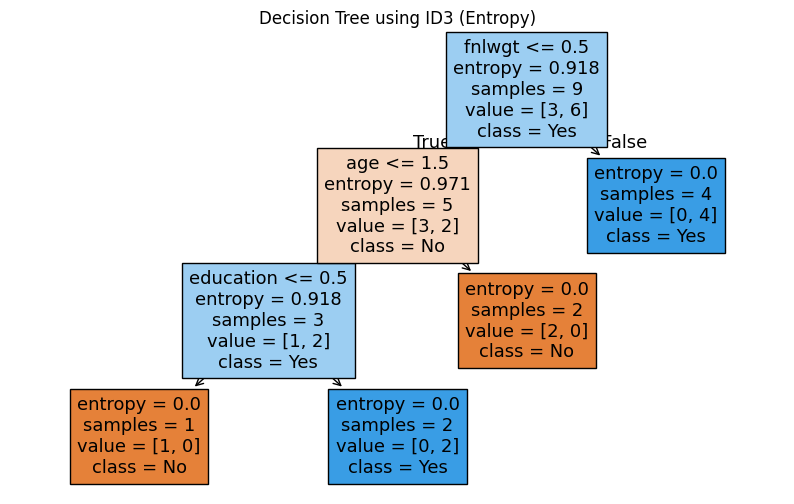

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No','Yes'])
plt.title("Decision Tree using ID3 (Entropy)")
plt.show()

## QUESTION NUMBER 2

In [ ]:
# Lab Task 2: Decision Tree Regression using Variance Reduction

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize Decision Tree Regressor
regressor = DecisionTreeRegressor(
    criterion='squared_error',   # Variance reduction criterion
    max_depth=5,                 
    random_state=42
)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression Results (Variance Reduction):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Decision Tree Regression Results (Variance Reduction):
Mean Squared Error (MSE): 0.5211
R² Score: 0.6030


## QUESTION NUMBER 3

In [54]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [56]:
adult = fetch_ucirepo(id=2)   # ID=2 corresponds to Adult dataset

# Extract features (X) and target (y)
X = adult.data.features
y = adult.data.targets

print("✅ Dataset Loaded Successfully!")
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")
print("\nMetadata:\n", adult.metadata)
print("\nVariable Info:\n", adult.variables.head())

✅ Dataset Loaded Successfully!
Features Shape: (48842, 14)
Target Shape: (48842, 1)

Metadata:
 {'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Beck

In [ ]:
# =============================
# Step 2: Data Preprocessing
# =============================

# Drop rows with missing values
data.dropna(inplace=True)

# Drop irrelevant column
data.drop(columns=['fnlwgt'], inplace=True)

# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# print("\n✅ Data Preprocessing Done!")
# print(f"Columns after encoding: {list(data.columns)}")


X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\n✅ Data Split Done: Train = {X_train.shape}, Test = {X_test.shape}")


# Step 4: Train Models

# --- ID3 Algorithm (Entropy - Information Gain)
model_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model_id3.fit(X_train, y_train)
y_pred_id3 = model_id3.predict(X_test)

# --- C4.5 Algorithm (Gain Ratio - conceptually entropy based)
model_c45 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_c45.fit(X_train, y_train)
y_pred_c45 = model_c45.predict(X_test)

# --- CART Algorithm (Gini Index)
model_cart = DecisionTreeClassifier(criterion='gini', random_state=42)
model_cart.fit(X_train, y_train)
y_pred_cart = model_cart.predict(X_test)

print("\n✅ Models Trained Successfully!")

✅ Dataset Loaded Successfully!

✅ Data Split Done: Train = (21113, 13), Test = (9049, 13)

✅ Models Trained Successfully!


In [ ]:

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred, average='weighted'), 3))
    print("Recall:", round(recall_score(y_true, y_pred, average='weighted'), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred, average='weighted'), 3))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate all models
evaluate_model(y_test, y_pred_id3, "ID3 (Entropy - Information Gain)")
print("----------------------------------------------------")
evaluate_model(y_test, y_pred_c45, "C4.5 (Gain Ratio Concept)")
print("----------------------------------------------------")
evaluate_model(y_test, y_pred_cart, "CART (Gini Index)")



--- ID3 (Entropy - Information Gain) ---
Accuracy: 0.844
Precision: 0.84
Recall: 0.844
F1 Score: 0.831
Confusion Matrix:
 [[6485  282]
 [1128 1154]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6767
           1       0.80      0.51      0.62      2282

    accuracy                           0.84      9049
   macro avg       0.83      0.73      0.76      9049
weighted avg       0.84      0.84      0.83      9049

----------------------------------------------------

--- C4.5 (Gain Ratio Concept) ---
Accuracy: 0.806
Precision: 0.806
Recall: 0.806
F1 Score: 0.806
Confusion Matrix:
 [[5901  866]
 [ 885 1397]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6767
           1       0.62      0.61      0.61      2282

    accuracy                           0.81      9049
   macro avg       0.74      0.74      0.74      9049
weight